# The MPG value of cars

## 0. Packages

In [2]:
# Handle table-like data and matrices calculation
import numpy as np
import scipy as sp
import pandas as pd


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Modelling Algorithms
# I will look at only four classification algorithms: LogisticRegression, GaussianNB, SVM, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
# from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

#### Some useful functions

In [9]:
def print_columns(df):
    print "There are",df.shape[1],'columns'
    print "They are:"
    for i in df.columns.values:
        print i
        
def list_null(df):
    print df.shape[1],' columns:'
    for i in df.columns.values:
        print i,': number of nan: ',df[i].isnull().sum(),', ',df[i].dtypes

# 1. Get to know our dataset

In [3]:
origin=pd.read_csv('auto-mpg.csv',sep=',')

In [4]:
origin.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [6]:
print_columns(origin)

There are 9 columns
They are:
mpg
cylinders
displacement
horsepower
weight
acceleration
model_year
origin
car_name


mpg is the dependent value, which need to be picked out later!!

In [10]:
list_null(origin)

9  columns:
mpg : number of nan:  0 ,  float64
cylinders : number of nan:  0 ,  int64
displacement : number of nan:  0 ,  float64
horsepower : number of nan:  6 ,  float64
weight : number of nan:  0 ,  int64
acceleration : number of nan:  0 ,  float64
model_year : number of nan:  0 ,  int64
origin : number of nan:  0 ,  int64
car_name : number of nan:  0 ,  object


In [8]:
origin.describe()

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 2. Clean our dataset

There is only one feature has null value and it only has 6 values, so We can try using average value

In [17]:
hp=pd.DataFrame()
hp['hp']=origin.horsepower
hp['hp'][hp.hp.isnull()]=hp['hp'].mean()

In [24]:
origin.horsepower.isnull().sum()

6

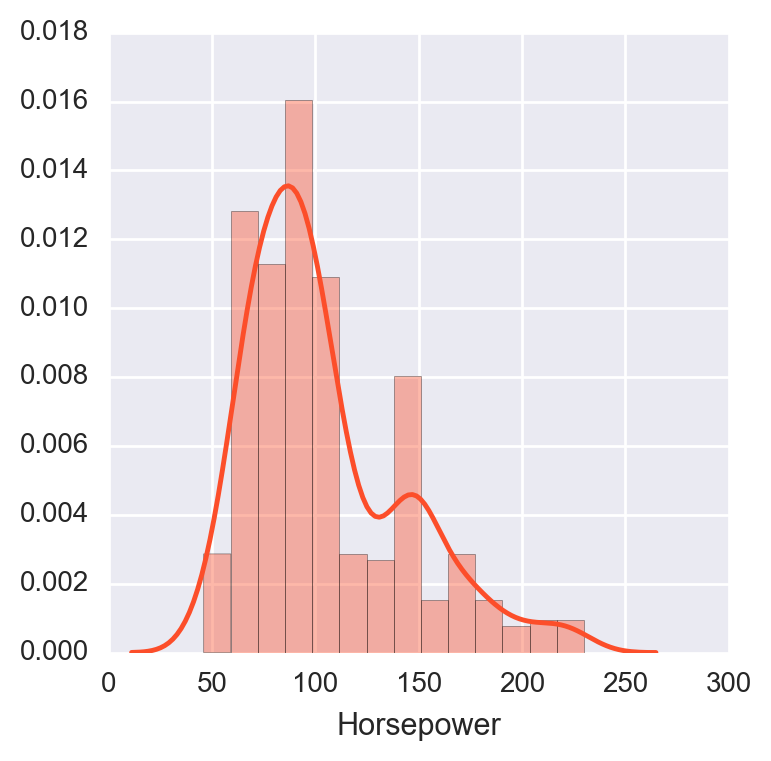

In [20]:
fig,axes=plt.subplots(1,1,figsize=(4,4))

sns.distplot(hp['hp'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=None,color='#fc4e2a', vertical=False, norm_hist=False, axlabel='Horsepower', label=None, ax=None)

In [25]:
hp1=pd.DataFrame()
hp1['hp']=origin.horsepower
average_hp   = hp1["hp"].mean()
std_hp       = hp1["hp"].std()
count_nan_hp = hp1["hp"].isnull().sum()
rand = np.random.randint(average_hp - std_hp,average_hp + std_hp, size = count_nan_hp)
hp1['hp'][hp1.hp.isnull()] = rand

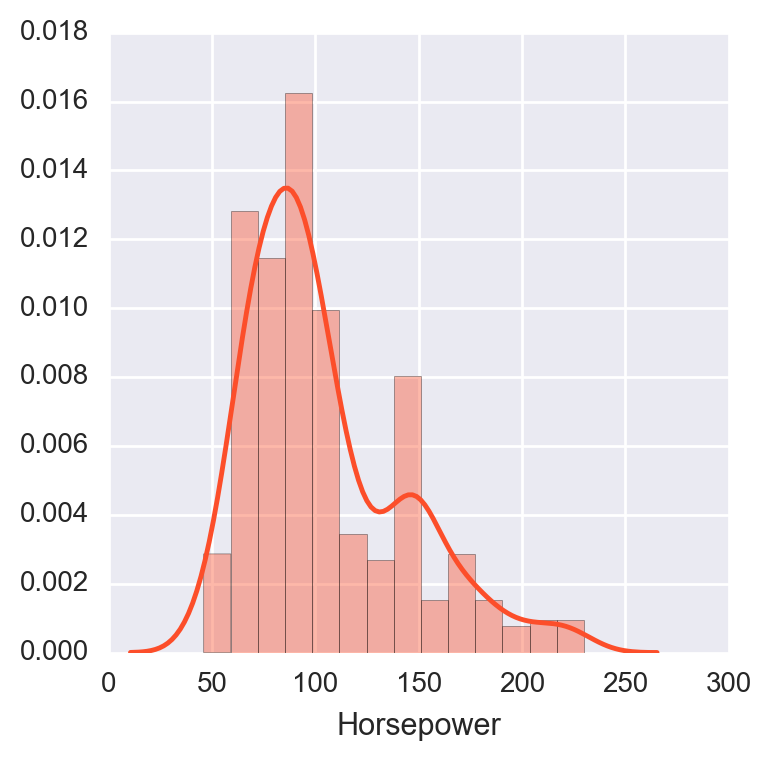

In [27]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
sns.distplot(hp1['hp'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=None,color='#fc4e2a', vertical=False, norm_hist=False, axlabel='Horsepower', label=None, ax=None)

These two pictures show that there are now big difference between the mean value filled null and normal distribution filled null. So for simplicity, I will do the mean value fill null

In [28]:
origin['horsepower'][origin.horsepower.isnull()]=origin.horsepower.mean()

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
list_null(origin)

9  columns:
mpg : number of nan:  0 ,  float64
cylinders : number of nan:  0 ,  int64
displacement : number of nan:  0 ,  float64
horsepower : number of nan:  0 ,  float64
weight : number of nan:  0 ,  int64
acceleration : number of nan:  0 ,  float64
model_year : number of nan:  0 ,  int64
origin : number of nan:  0 ,  int64
car_name : number of nan:  0 ,  object


Now let's look at the correlation between all the quantities

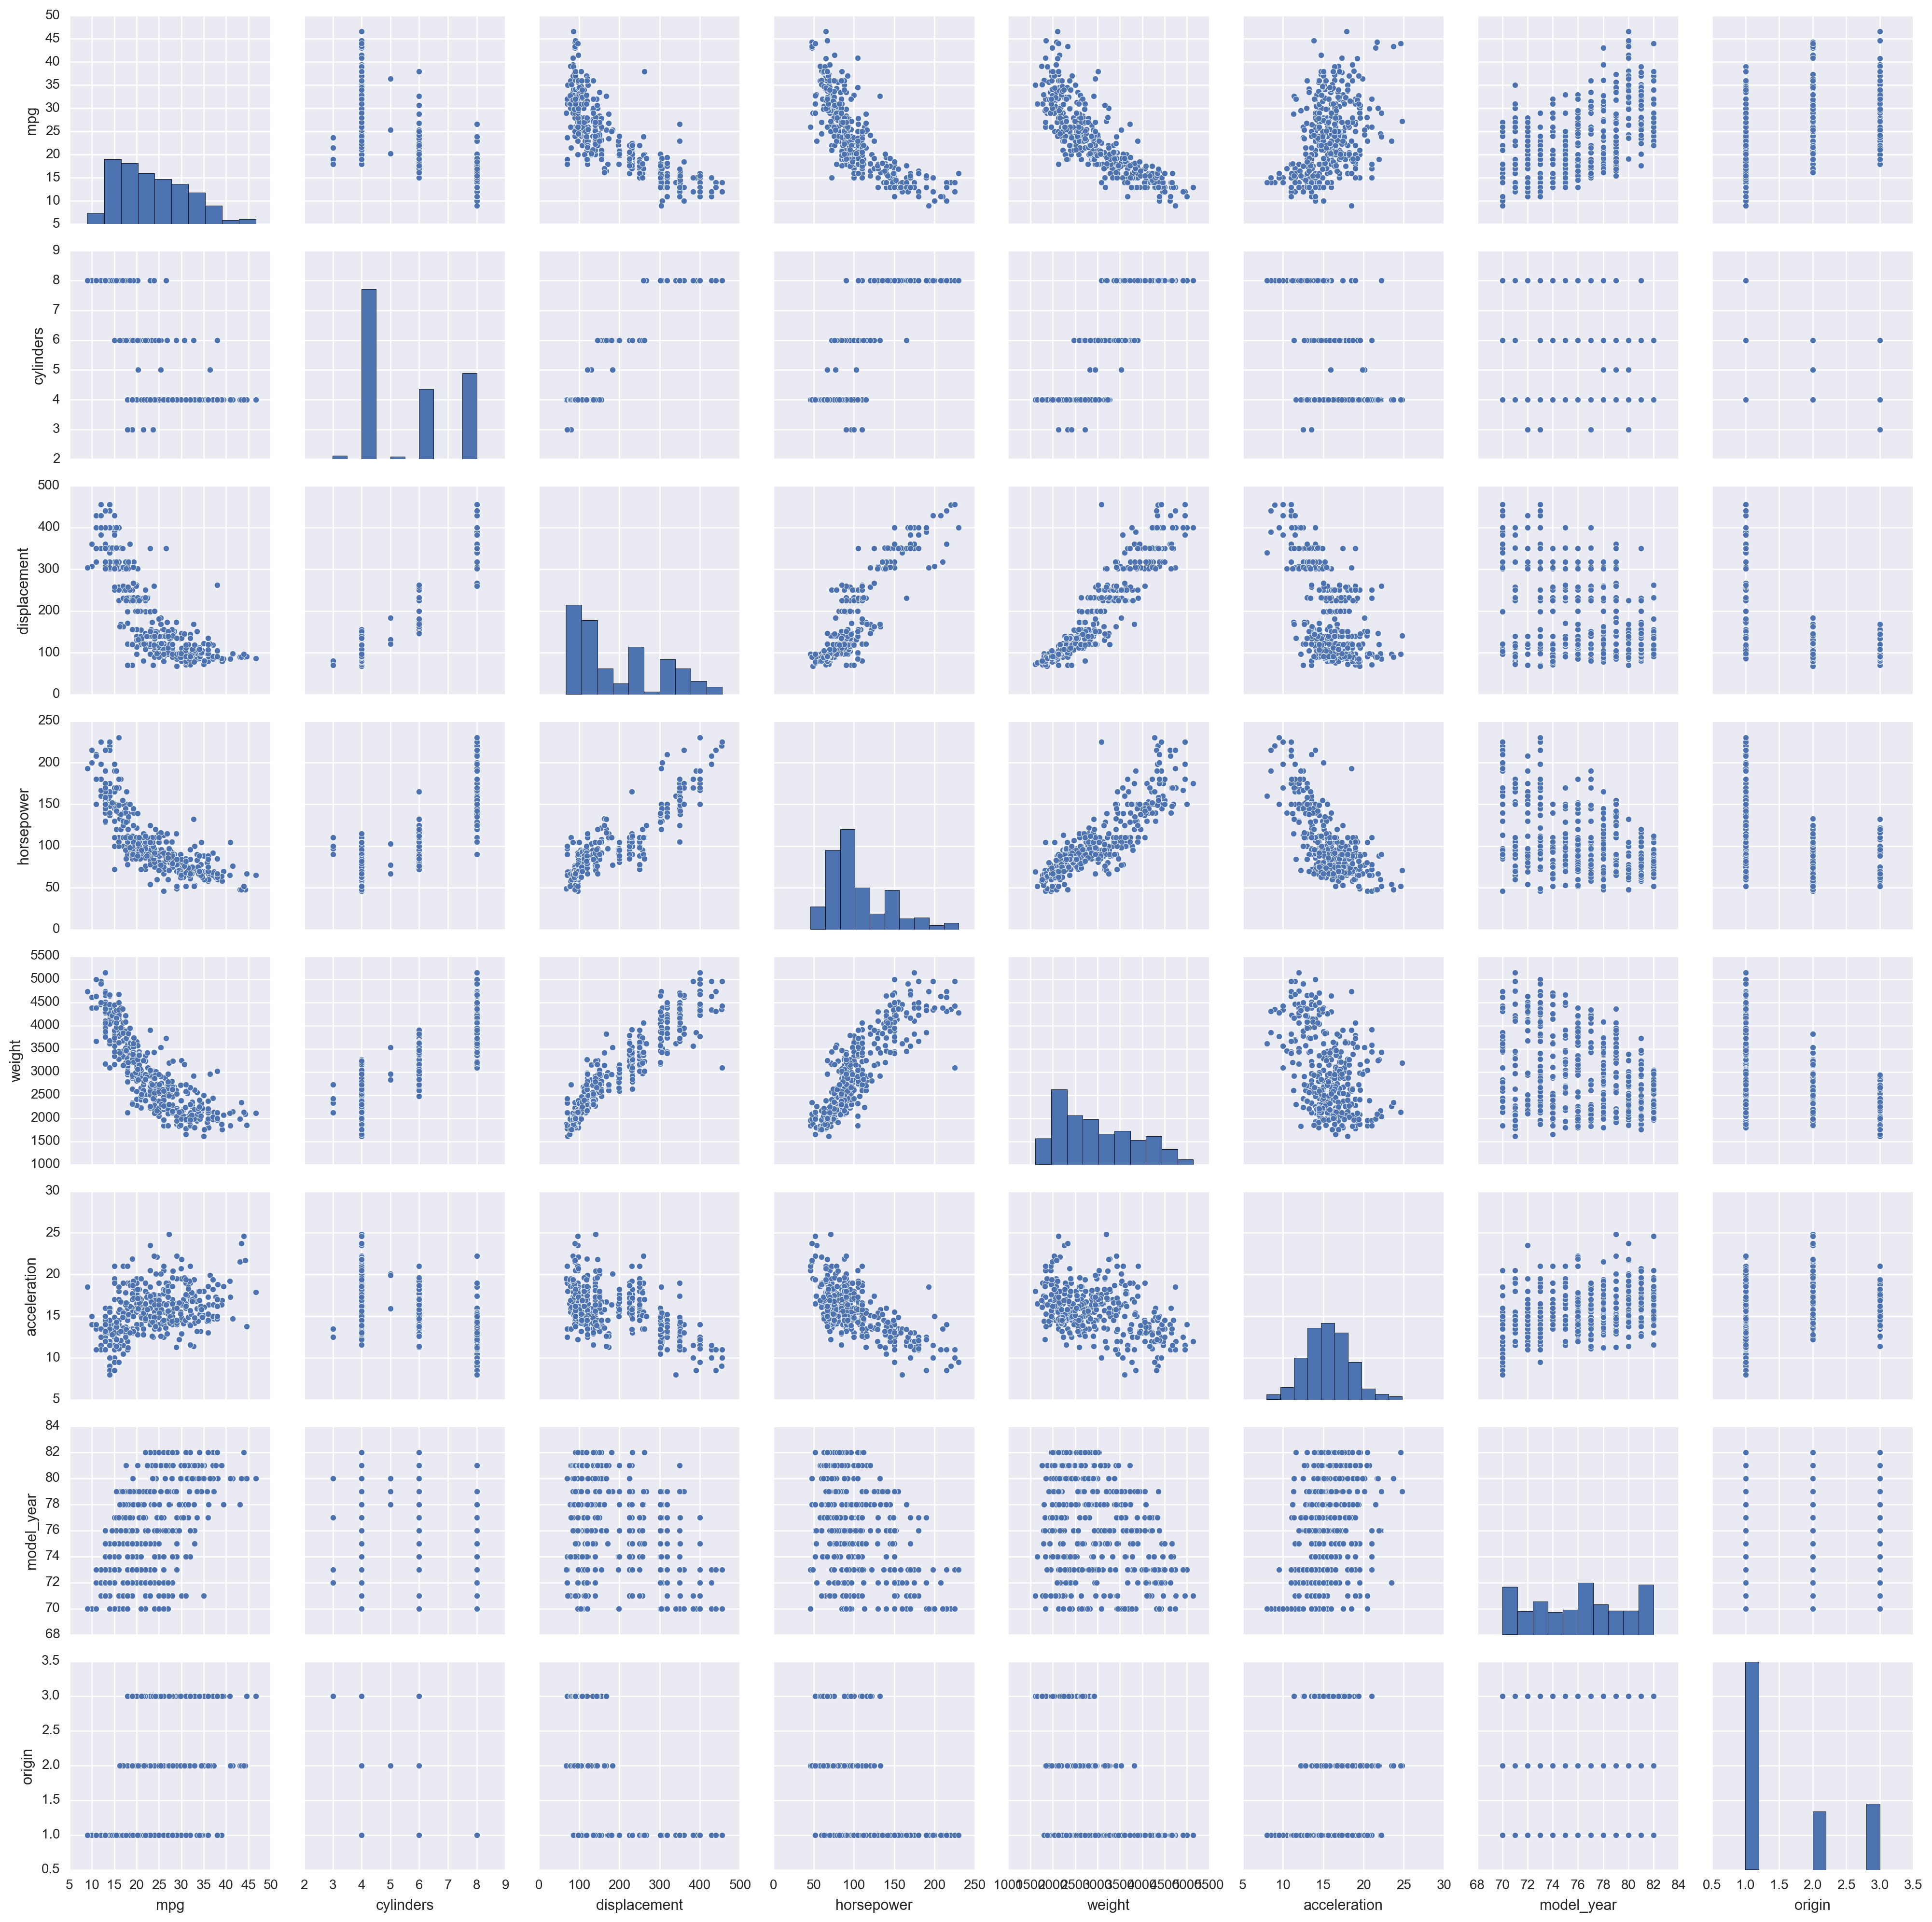

In [32]:
sns.pairplot(origin,palette="husl")